# Instala dependências

In [79]:
%pip install graphviz
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\vitor\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\vitor\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [80]:
#basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#text process
import nltk
import unidecode
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision tree
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier,export_graphviz

# Processamento dos dados

Como existem dados textuais podemos usar as funções já utilizadas no trabalho anterior




In [81]:
with open('./data/dataset.csv', encoding="utf8") as file:
    df = pd.read_csv(file)
    
df.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0
1,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
2,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
3,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
4,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [82]:
df.text = [c.lower() for c in df.text]

## Separação treino e teste

Ocorre a separação do dataset em treino em teste na proporção 80% pra 20%, respectivamente, além disso, a criação dos mesmo é feito de forma aleatória para não criarmos dataset enviesados, além de estar estratificado com o dataset.

In [83]:
from sklearn.model_selection import train_test_split

df_train_raw, df_test_raw = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['target'])

df_train_raw = df_train_raw.sort_values(by=['id']).reset_index(drop=True)
df_test_raw = df_test_raw.sort_values(by=['id']).reset_index(drop=True)

df_train_raw = df_train_raw

# Trainset

In [84]:
print(df_train_raw.shape)
df_train_raw.head()

(8700, 5)


,id,keyword,location,text,target
0,0,NaN,NaN,just happened a terrible car crash,0
1,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
2,2,NaN,NaN,"heard about #earthquake is different cities, s...",0
3,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0
4,4,NaN,NaN,forest fire near la ronge sask. canada,1


[Text(0, 0, 'Non Desaster'), Text(1, 0, 'Desaster')]

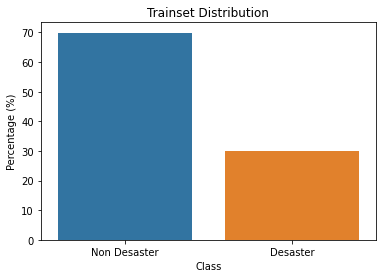

In [85]:
ax = sns.barplot(x='target', y='target',data = df_train_raw, estimator=lambda  x: len(x)/len(df_train_raw)*100)

ax.set_title('Trainset Distribution')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Class')
ax.set_xticklabels(["Non Desaster","Desaster"])

# Testset

In [86]:
print(df_test_raw.shape)
df_test_raw.head()

(2176, 5)


,id,keyword,location,text,target
0,9,NaN,NaN,apocalypse lighting. #spokane #wildfires,0
1,11,NaN,NaN,typhoon soudelor kills 28 in china and taiwan,0
2,12,NaN,NaN,we're shaking...it's an earthquake,0
3,24,NaN,NaN,i love fruits,0
4,31,NaN,NaN,this is ridiculous....,0


[Text(0, 0, 'Non Desaster'), Text(1, 0, 'Desaster')]

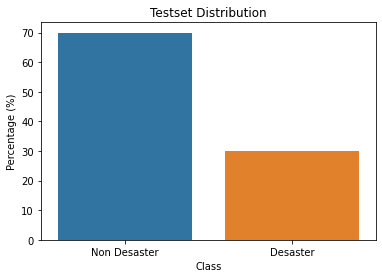

In [87]:
ax = sns.barplot(x='target', y='target',data = df_test_raw, estimator=lambda  x: len(x)/len(df_test_raw)*100)

ax.set_title('Testset Distribution')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Class')
ax.set_xticklabels(["Non Desaster","Desaster"])

## O impacto dos Hashtags nos tweets

In [88]:
def findHashtags(text: str):
    return [tag.strip("#") for tag in text.split() if tag.startswith("#")]

df_train_raw['hashtags'] = df_train_raw.text.copy()
df_train_raw['hashtags'] = df_train_raw['hashtags'].apply(findHashtags)

df_test_raw['hashtags'] = df_test_raw.text.copy()
df_test_raw['hashtags'] = df_test_raw['hashtags'].apply(findHashtags)

## Estudo da distribuição dos hashtags

In [89]:
hashtags_train = set()
for i in df_train_raw.hashtags:
    for j in i:
        hashtags_train.add(j)
hashtags_test=set()
for i in df_train_raw.hashtags:
    for j in i:
        hashtags_test.add(j)

### Find ocorrences of trainset

In [90]:
m={}
for i in range(df_train_raw.shape[0]):
    for j in df_train_raw.hashtags[i]:
        if df_train_raw['target'][i]:
            if(j not in m):
                m[j]=df_train_raw['target'][i]
            else:
                m[j]+=df_train_raw['target'][i]

# Sort the freq dict
freq_hashtags = {k: v for k, v in reversed(sorted(m.items(), key=lambda item: item[1]))}
print(freq_hashtags)

{'news': 42, '???': 18, 'hiroshima': 18, '??': 16, 'earthquake': 16, 'best': 10, 'prebreak': 10, 'hot': 10, 'japan': 10, 'india': 9, 'sismo': 8, 'world': 8, 'terrorism': 7, 'islam': 7, 'abstorm': 7, 'worldnews': 7, 'fukushima': 6, 'wx': 6, 'yyc': 6, 'rohingya': 6, 'wildfire': 6, 'isis': 5, 'bestnaijamade:': 5, 'nuclear': 5, 'africa': 5, 'okwx': 5, 'sittwe': 5, 'myanmar': 5, 'cnn': 5, 'breaking': 5, 'wildfires': 5, 'photography': 4, 'japì_n': 4, 'somalia': 4, 'sandiego': 4, 'bbc': 4, 'libya': 4, 'hostages': 4, 'hailstorm': 4, 'phoenix': 4, 'wmata': 4, 'mh370': 4, '\x89û_': 4, 'science': 3, 'idfire': 3, 'thunderstorm': 3, 'usnwsgov': 3, 'lies': 3, 'quran': 3, 'god': 3, 'truth': 3, 'gabon': 3, 'nytimes': 3, 'antioch': 3, 'guillermo': 3, 'hurricane': 3, 'bjp': 3, 'tdp': 3, 'trs': 3, 'nri': 3, 'ts': 3, 'ap': 3, 'iran': 3, 'boston': 3, 'arwx': 3, 'pakistan': 3, 'socialnews': 3, 'casper': 3, 'atlanta': 3, 'miami': 3, 'koin6news': 3, 'solar': 3, 'emergency': 3, 'drought': 3, 'genocide;': 3, 's

### Create a feature based in the hashtags

This feature will be 0 if any of the hashtags in the tweet has relevance to a disaster tweet, and will have a value greate than 0 if it has.

In [91]:
df_train_raw['mean_hashtags_target'] = [0,] * df_train_raw.shape[0]
df_test_raw['mean_hashtags_target'] = [0,] * df_test_raw.shape[0]

df_train_raw.head()

,id,keyword,location,text,target,hashtags,mean_hashtags_target
0,0,NaN,NaN,just happened a terrible car crash,0,[],0
1,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,[earthquake],0
2,2,NaN,NaN,"heard about #earthquake is different cities, s...",0,[earthquake],0
3,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0,[],0
4,4,NaN,NaN,forest fire near la ronge sask. canada,1,[],0


In [92]:
def computeMeanHashtags(df_func):
    aux = np.zeros(df_func.shape[0])
    for i in range(df_func.shape[0]):
        for j in df_func.hashtags[i]:
            if j in m:
                aux[i] += m[j]
        if len(df_func.hashtags[i]) != 0:
            aux[i] /= len(df_func.hashtags[i])
    df_func['mean_hashtags_target'] = aux

computeMeanHashtags(df_train_raw)
computeMeanHashtags(df_test_raw)
df_train_raw.head(15)

,id,keyword,location,text,target,hashtags,mean_hashtags_target
0,0,NaN,NaN,just happened a terrible car crash,0,[],0.000000
1,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,[earthquake],16.000000
2,2,NaN,NaN,"heard about #earthquake is different cities, s...",0,[earthquake],16.000000
3,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0,[],0.000000
4,4,NaN,NaN,forest fire near la ronge sask. canada,1,[],0.000000
5,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,[],0.000000
6,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[wildfires],5.000000
7,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,"[alaska, wildfires]",3.000000
8,8,NaN,NaN,#rockyfire update => california hwy. 20 closed...,1,"[rockyfire, cafire, wildfires]",3.333333
9,10,NaN,NaN,#flood #disaster heavy rain causes flash flood...,1,"[flood, disaster]",2.500000


## Limpeza dos textos dos tweets

Um coisa interessante de se pensar é que os dados textuais se dão através de textos escritos por pessoas em sua rede social tweeter e podem existir erros de digitação assim é importante tentar corrigir as palavras mal escritas. Para isso podemos usar a biblioteca spell checker.

In [93]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Reutilizando funções do trabalho prático

In [94]:
def remove_specials(tokens):
    return [unidecode.unidecode(word) for word in tokens]

def remove_punctuation(tokens):
    table = str.maketrans("","",string.punctuation)
    return [w.translate(table) for w in tokens]

def array_lower(tokens):
    return [w.lower() for w in tokens]

def remove_no_words(tokens):
    return [word for word in tokens if word.isalpha()]

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [w for w in tokens if not w in stop_words]


def text_cleaner(string):
   
    # Dividindo texto em tokens
    string = word_tokenize(string)
    #df_text_column = df_text_column.apply(word_tokenize)
    
    # Convertendo texto para minusculo
    string = array_lower(string)
    #df_text_column = df_text_column.apply(array_lower)

    # Removendo pontuação
    string = remove_punctuation(string)
    #df_text_column = df_text_column.apply(remove_punctuation)
    
    # Removendo caracteres especiais
    string = remove_specials(string)
    #df_text_column = df_text_column.apply(remove_specials)

    # Removendo tokens que não sao palavras
    string = remove_no_words(string)
    #df_text_column = df_text_column.apply(remove_no_words)

    # Removendo tokens que são stop words
    string = remove_stop_words(string)
    #df_text_column = df_text_column.apply(remove_stop_words)
    
    return string

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

#do_nothing = lambda x: x
N_COMPONENTS = 1000 #Vimos com o PCA diminuindo metade das featues tinha uma variancia explicada alta

wordnet_lemmatizer = WordNetLemmatizer()
lemmazation = lambda words: [wordnet_lemmatizer.lemmatize(tk) for tk in words]


tfidf = TfidfVectorizer(tokenizer = lemmazation,lowercase=False, preprocessor=text_cleaner, ngram_range=(1, 2),min_df=10,max_df=0.95)

text_process_pipe = Pipeline([
                             ("tfidf",tfidf),
                             ("pca", TruncatedSVD(n_components=N_COMPONENTS))
                             ])


In [96]:
X_train = text_process_pipe.fit_transform(df_train_raw['text'])
#X_train = np.c_[X_train, df_train_raw['mean_hashtags_target']]
y_train = df_train_raw['target']

In [97]:
X_test = text_process_pipe.transform(df_test_raw['text'])
#X_test = np.c_[X_test, df_test_raw['mean_hashtags_target']]
y_test = df_test_raw['target']

In [98]:
print(f"Total variance explained: {text_process_pipe['pca'].explained_variance_ratio_.sum()*100:.2f}%")

Total variance explained: 89.71%


In [99]:
X_test.shape

(2176, 1000)

In [100]:
#Transforma as features em um Dataframe
X_train_view = pd.DataFrame(data=X_train, columns=list(range(N_COMPONENTS)))
X_train_view.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.027389,0.023884,0.002444,0.018444,0.009593,0.002070,0.011601,0.017625,-0.020172,-0.002026,...,-0.001434,-0.009536,-0.018039,0.017681,-0.025088,0.020344,-0.045330,0.048526,0.040683,0.003308
1,0.058016,0.073551,0.002261,0.034070,-0.019065,-0.016369,-0.122046,-0.037951,-0.083589,-0.011425,...,-0.005128,-0.003816,-0.001624,0.001042,-0.005589,-0.000613,-0.010373,-0.003783,-0.007407,0.009493
2,0.024883,0.030208,0.006755,0.017865,-0.003076,-0.001520,-0.010396,-0.001097,-0.018971,0.014374,...,0.015317,-0.027650,0.021444,0.009798,-0.018750,0.014400,-0.016583,0.050521,0.006632,0.009217
3,0.048726,0.081896,0.290821,-0.111858,-0.012932,0.017581,-0.046255,-0.055929,0.054285,-0.128578,...,0.009300,0.000585,0.035564,-0.020815,-0.001053,0.034096,0.003032,0.008726,-0.042974,-0.005467
4,0.051358,0.079297,0.313714,-0.122388,-0.017218,0.021087,-0.070999,-0.055730,0.075089,-0.147684,...,0.024258,-0.028731,-0.020692,0.028049,0.023425,-0.027998,0.017469,-0.043639,0.005611,0.010183


Text(0, 0.5, 'Variancia explicada')

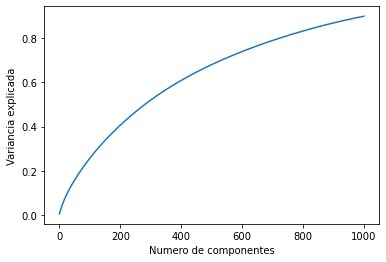

In [101]:
plt.plot(np.cumsum(text_process_pipe['pca'].explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia explicada')

# Analise exploratória de cada classe

Os dados possuem 2 classes são elas:

0 - Tweets sobre desastres que são fake (Não Desastre)

1 - Tweets sobre desastres que são reais (Desastre)

[Text(0, 0, 'Não Desastre'), Text(1, 0, 'Desastre')]

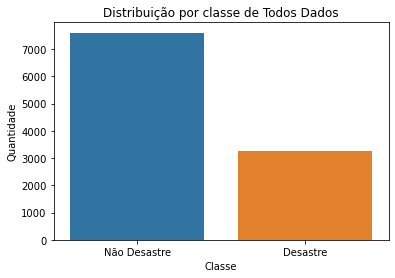

In [102]:
ax = sns.countplot(x='target',data = df)

ax.set_title('Distribuição por classe de Todos Dados')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Classe')
ax.set_xticklabels(["Não Desastre","Desastre"])

Podemos comparar algumas caracteristicas do texto, como tamanho do texto e a quantidade de tokens geradas por cada.

Text(0.5, 1.05, 'Distribuição da quantidade de caracteres do tweet por classe')

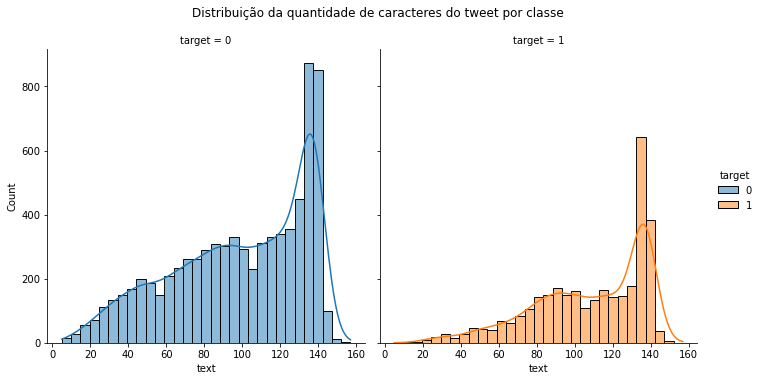

In [103]:
ax = sns.displot(x=df['text'].str.len(),data = df,col='target',hue='target',kde=True)

ax.fig.suptitle('Distribuição da quantidade de caracteres do tweet por classe',y=1.05)

# Classificadores

In [104]:
def test_classifier(classifier,params, X_train,y_train,X_test,y_test):
    if params:
        clf = GridSearchCV(classifier, params, scoring = 'f1_macro',n_jobs = -1,cv=5, verbose=2)
    else:
        clf = classifier

    clf.fit(X_train, y_train)
    
    print(clf.best_params_) if params else print("Done")
    
    y_predicted = clf.predict(X_test)
    
    print(classification_report(y_test, y_predicted))
    ConfusionMatrixDisplay.from_predictions(y_test, y_predicted);
    
    return clf

## Knn

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1522
           1       0.57      0.35      0.43       654

    accuracy                           0.73      2176
   macro avg       0.67      0.62      0.63      2176
weighted avg       0.70      0.73      0.70      2176



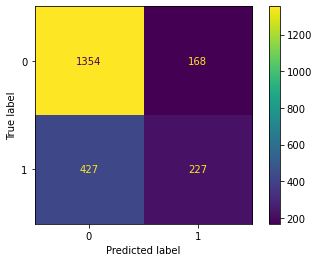

In [105]:
params = {'n_neighbors': [3,5,7,11,13]}

knn = test_classifier(KNeighborsClassifier(),params,X_train,y_train,X_test,y_test)

### KNN modified

In [106]:
'''
hashtag_importance = 0.6
auXtrain = X_train.copy()
auXtrain[0:999] *= 1-hashtag_importance
auXtrain[1000] *= hashtag_importance

auxXtest = X_test.copy()
auxXtest[0:999] *= 1-hashtag_importance
auxXtest[1000] *= hashtag_importance

params = {'n_neighbors': [3,5,7,11,13]}

knn = test_classifier(KNeighborsClassifier(),params,auXtrain,y_train,auxXtest,y_test)
'''

"\nhashtag_importance = 0.6\nauXtrain = X_train.copy()\nauXtrain[0:999] *= 1-hashtag_importance\nauXtrain[1000] *= hashtag_importance\n\nauxXtest = X_test.copy()\nauxXtest[0:999] *= 1-hashtag_importance\nauxXtest[1000] *= hashtag_importance\n\nparams = {'n_neighbors': [3,5,7,11,13]}\n\nknn = test_classifier(KNeighborsClassifier(),params,auXtrain,y_train,auxXtest,y_test)\n"

## Decision Tree

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1522
           1       0.47      0.36      0.41       654

    accuracy                           0.68      2176
   macro avg       0.61      0.59      0.60      2176
weighted avg       0.67      0.68      0.67      2176



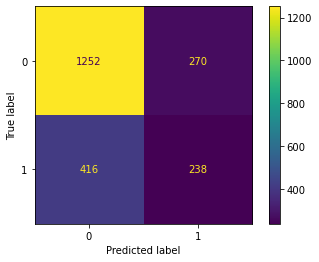

In [107]:
params = {'criterion':['gini','entropy'],
          'max_depth':[None,5,10,50,100],
          'max_features':["auto", "sqrt", "log2"]}

dt = test_classifier(DecisionTreeClassifier(),params,X_train,y_train,X_test,y_test)

In [108]:
dot_data = export_graphviz(dt.best_estimator_, out_file=None,
                     filled=True, rounded=True,  
                     special_characters=True)

graph = graphviz.Source(dot_data)  
#graph.render("dt-vis",view = True)
#graph

## SVM

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'probability': True}
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1522
           1       0.60      0.46      0.52       654

    accuracy                           0.75      2176
   macro avg       0.70      0.67      0.68      2176
weighted avg       0.73      0.75      0.74      2176



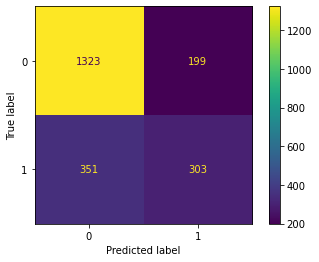

In [110]:
from sklearn.svm import SVC
'''
param_svm = {'C': [0.1,1, 10, 100],
             'gamma': [1,0.1,0.01,0.001],
             'kernel': ['rbf']}
'''
#Foi feita a busca com os parametros acima, para não ficar demorando muito oq deu melhor coloquei aqui
param_svm = {'C': [100],
             'gamma': [0.01],
             'kernel': ['rbf'],
             'probability': [True]}
svm = test_classifier(SVC(),param_svm, X_train,y_train,X_test,y_test)

# Junções classificadores

## Random Forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1522
           1       0.55      0.29      0.38       654

    accuracy                           0.72      2176
   macro avg       0.65      0.59      0.60      2176
weighted avg       0.69      0.72      0.68      2176



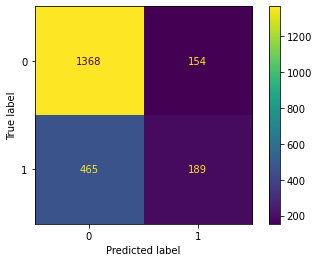

In [111]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [10, 100,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

rf = test_classifier(RandomForestClassifier(),params,X_train,y_train,X_test,y_test)

## Boosting

Done
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1522
           1       0.45      0.35      0.39       654

    accuracy                           0.68      2176
   macro avg       0.60      0.58      0.59      2176
weighted avg       0.66      0.68      0.66      2176



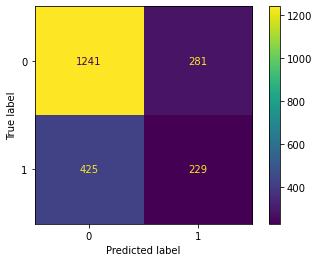

In [112]:
from sklearn.ensemble import AdaBoostClassifier

params_boost_dt = dt.best_params_
dt_b=DecisionTreeClassifier(criterion=params_boost_dt['criterion'],max_depth=params_boost_dt['max_depth'],max_features=params_boost_dt['max_features'])
boost = test_classifier(AdaBoostClassifier(base_estimator=dt_b, n_estimators=50, learning_rate=1), None,X_train,y_train,X_test,y_test)

## Bagging

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    2.6s remaining:    5.4s
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:    3.2s remaining:    1.6s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    4.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Done


[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:   11.4s remaining:   22.9s
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   12.5s remaining:   12.5s
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:   16.2s remaining:    8.1s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   22.4s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   22.4s finished


              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1522
           1       0.60      0.35      0.44       654

    accuracy                           0.73      2176
   macro avg       0.68      0.62      0.63      2176
weighted avg       0.71      0.73      0.71      2176



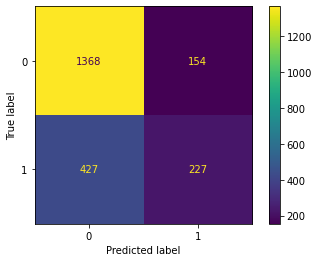

In [113]:
from sklearn.ensemble import BaggingClassifier

knn_bag = KNeighborsClassifier(n_neighbors=knn.best_params_['n_neighbors'])
bag = test_classifier(BaggingClassifier(base_estimator=knn_bag, n_estimators=20, verbose=10, n_jobs=6), None, X_train,y_train,X_test,y_test)

## Comparando os classificadores binarios com a curva ROC

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:   14.9s remaining:   29.9s
[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:   15.7s remaining:   15.7s
[Parallel(n_jobs=6)]: Done   4 out of   6 | elapsed:   17.9s remaining:    8.9s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   21.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   21.0s finished


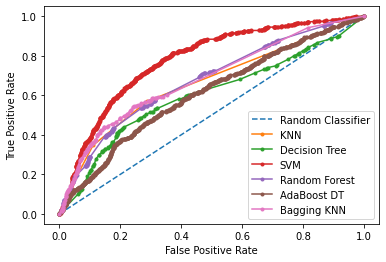

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

eq_probs = [0 for _ in range(len(y_test))] #Classificador equiprovavel , classifica com 50% de chance
eq_fpr , eq_tpr , _ = roc_curve(y_test,eq_probs)
plt.plot(eq_fpr,eq_tpr,linestyle='--',label = "Random Classifier")

classifiers = [knn,dt,svm,rf,boost,bag]
label = ["KNN","Decision Tree","SVM","Random Forest","AdaBoost DT","Bagging KNN"]
for classifier,label in zip(classifiers,label):
    class_probs = classifier.predict_proba(X_test)
    class_probs = class_probs[:,1] #apenas a chance de classificar a classe positiva

    class_fpr , class_tpr , _ = roc_curve(y_test,class_probs)
    plt.plot(class_fpr,class_tpr,marker='.',label = label)



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()